In [10]:
import pandas as pd

# Load Branch Level Data and Member Level Data
branch_data = pd.read_csv("Branch_Level_Dataset.csv")
member_data = pd.read_csv("Member_Level_Dataset.csv")

# Merge the datasets based on "BranchCategory" column
merged_data = pd.merge(branch_data, member_data, on="BranchCategory")

In [25]:
# Assuming 'merged_data' is your DataFrame
pd.set_option('display.max_columns', None)
print(merged_data.head())

  EOM_TRANS_DATE_x     BranchCategory  ATM  Bill Payment  Cash  Draft   ACH  \
0       2022-01-31  Altamonte Springs   98           394    64    469  1589   
1       2022-01-31  Altamonte Springs   98           394    64    469  1589   
2       2022-01-31  Altamonte Springs   98           394    64    469  1589   
3       2022-01-31  Altamonte Springs   98           394    64    469  1589   
4       2022-01-31  Altamonte Springs   98           394    64    469  1589   

   Fee  Credit/Debit Card  Home Banking  Dividend  \
0  416               1642           646      3650   
1  416               1642           646      3650   
2  416               1642           646      3650   
3  416               1642           646      3650   
4  416               1642           646      3650   

                            Unique_Member_Identifier EOM_TRANS_DATE_y  age  \
0  a576fcbf497fb0a8e19935024177d8b640b5802b1b0378...       2022-01-31   23   
1  46e5d1bbc9afbed02c766089c913613e867324f5fa0bea.

/Users/nisshanth/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


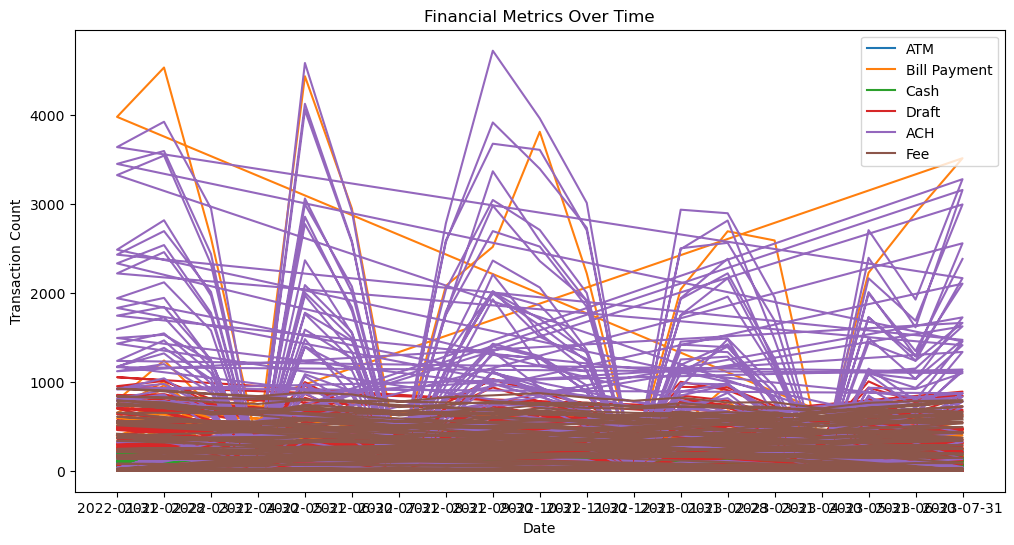

In [12]:
#Testing Financial Metrics

import pandas as pd
import matplotlib.pyplot as plt

# Extract relevant columns for financial metrics
financial_data = merged_data[['EOM_TRANS_DATE_x', 'ATM', 'Bill Payment', 'Cash', 'Draft', 'ACH', 'Fee']]

# Plotting Transaction Volumes over time
plt.figure(figsize=(12, 6))
for col in financial_data.columns[1:]:
    plt.plot(financial_data['EOM_TRANS_DATE_x'], financial_data[col], label=col)

plt.title('Financial Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()


In [14]:
print(merged_data.columns)


Index(['EOM_TRANS_DATE_x', 'BranchCategory', 'ATM', 'Bill Payment', 'Cash',
       'Draft', 'ACH', 'Fee', 'Credit/Debit Card', 'Home Banking', 'Dividend',
       'Unique_Member_Identifier', 'EOM_TRANS_DATE_y', 'age', 'address_zip',
       'n_accts', 'n_checking_accts', 'n_savings_accts', 'n_open_loans',
       'n_open_cds', 'n_open_club_accts', 'n_open_credit_cards', 'ATMCount',
       'BillPaymentCount', 'CashCount', 'DraftCount', 'ACHCount', 'FeeCount',
       'Credit_DebitCount', 'Home_Banking', 'WireCount', 'DividendCount'],
      dtype='object')


/var/folders/5v/dw8pg9hn4453bwh0qfjpty_h0000gn/T/ipykernel_22123/120867453.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  financial_trends_data['EOM_TRANS_DATE_x'] = pd.to_datetime(financial_trends_data['EOM_TRANS_DATE_x'])


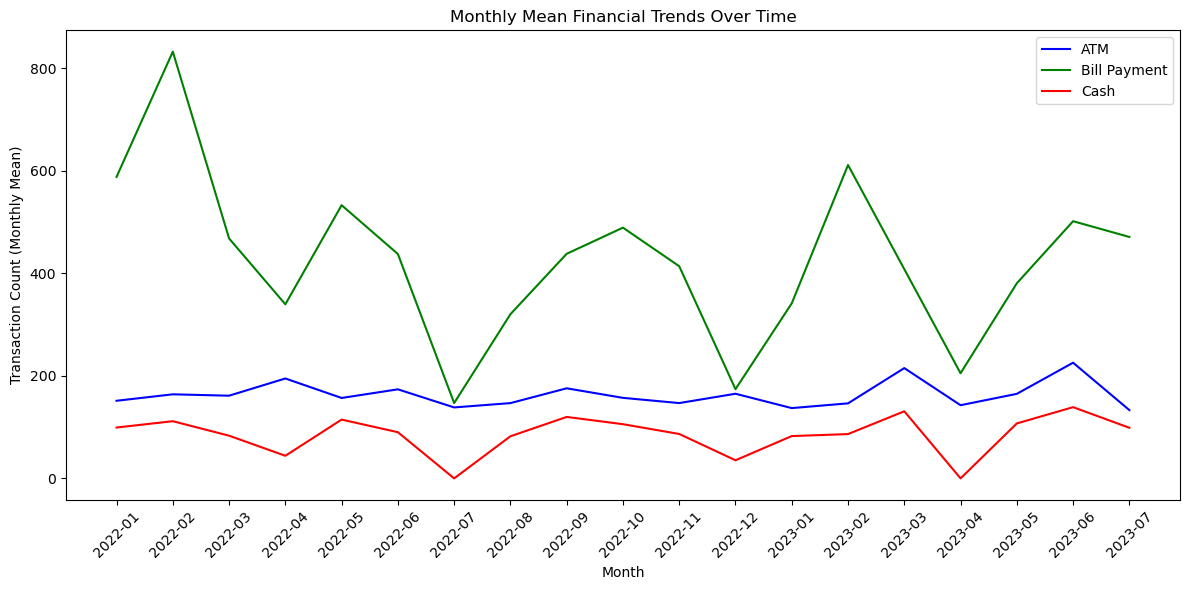

In [20]:
#Testing Market Dynamics

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'merged_data' is the DataFrame with the merged branch and member data
# Extract relevant columns for financial trends
financial_trends_columns = ['EOM_TRANS_DATE_x', 'ATM', 'Bill Payment', 'Cash']

# Check if the columns are present in the DataFrame
for col in financial_trends_columns:
    if col not in merged_data.columns:
        print(f"Column '{col}' not found in the DataFrame.")

# Extract relevant columns for financial trends
financial_trends_data = merged_data[financial_trends_columns]

# Convert 'EOM_TRANS_DATE_x' to datetime format
financial_trends_data['EOM_TRANS_DATE_x'] = pd.to_datetime(financial_trends_data['EOM_TRANS_DATE_x'])

# Group by month and calculate the mean for each month
monthly_mean = financial_trends_data.groupby(financial_trends_data['EOM_TRANS_DATE_x'].dt.to_period("M")).mean()

# Plotting ATM, Bill Payment, and Cash transactions over time (monthly mean)
plt.figure(figsize=(12, 6))
plt.plot(monthly_mean.index.astype(str), monthly_mean['ATM'], label='ATM', color='blue')
plt.plot(monthly_mean.index.astype(str), monthly_mean['Bill Payment'], label='Bill Payment', color='green')
plt.plot(monthly_mean.index.astype(str), monthly_mean['Cash'], label='Cash', color='red')
plt.title('Monthly Mean Financial Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Transaction Count (Monthly Mean)')
plt.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()






/var/folders/5v/dw8pg9hn4453bwh0qfjpty_h0000gn/T/ipykernel_22123/3185885934.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demographic_data['EOM_TRANS_DATE_x'] = pd.to_datetime(demographic_data['EOM_TRANS_DATE_x'])


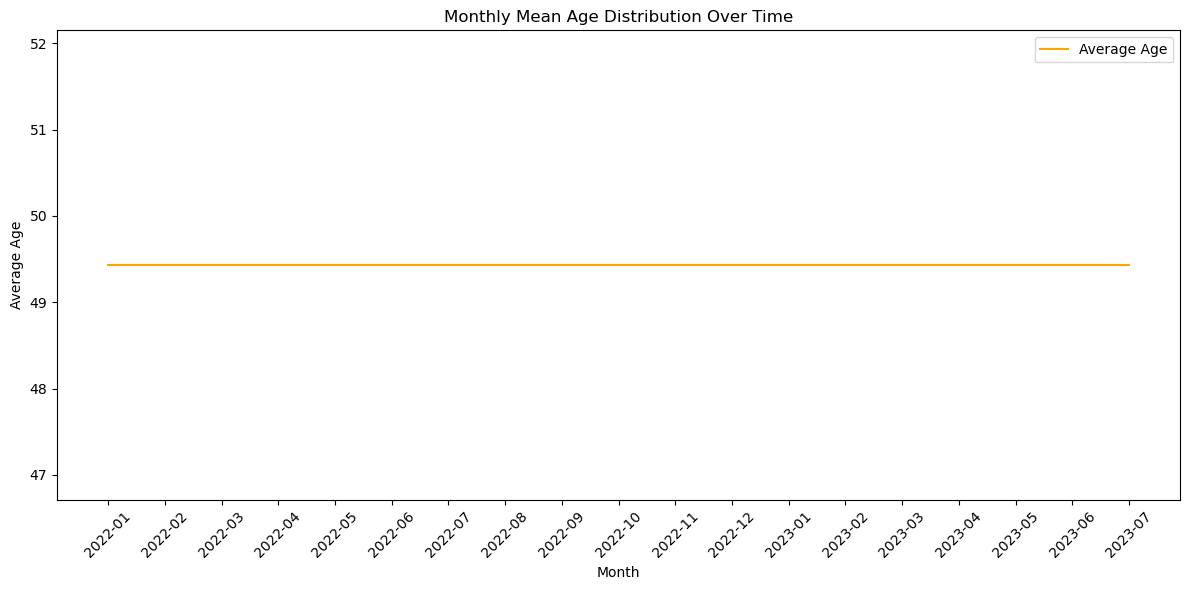

In [21]:
# Testing demographic trends

# Assuming 'merged_data' is the DataFrame with the merged branch and member data
# Extract relevant columns for demographic trends
demographic_columns = ['EOM_TRANS_DATE_x', 'age']

# Check if the columns are present in the DataFrame
for col in demographic_columns:
    if col not in merged_data.columns:
        print(f"Column '{col}' not found in the DataFrame.")

# Extract relevant columns for demographic trends
demographic_data = merged_data[demographic_columns]

# Plotting Age distribution over time
plt.figure(figsize=(12, 6))
plt.plot(demographic_data['EOM_TRANS_DATE_x'], demographic_data['age'], label='Age Distribution', color='orange')
plt.title('Age Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Age')
plt.legend()
plt.show()